In [ ]:
# 라이브러리 모음
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.graph_objects as go
import plotly.express as px

# 모듈 모음
import modules as mds

In [ ]:
# Windows에서 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕'이 설치되어 있을 경우
plt.rcParams['axes.unicode_minus'] = False     # 마이너스(-) 부호 깨짐 방지

In [3]:
# macOS에서 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'   # macOS 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# 누적 설비용량 데이터 정리

# 누적 / 연도별 데이터 불러오기
data_total = pd.read_excel("dataset/지역별_누적_설비용량.xlsx")
data_2024 = pd.read_excel("dataset/2024년도_신규_설비용량.xlsx")
data_2023 = pd.read_excel("dataset/2023년도_신규_설비용량.xlsx")
data_2022 = pd.read_excel("dataset/2022년도_신규_설비용량.xlsx")
data_2021 = pd.read_excel("dataset/2021년도_신규_설비용량.xlsx")

# 데이터프레임으로 변환
# ic = Installed Capacity = 설비용량
ic_total = pd.DataFrame(data_total)
ic_2024 = pd.DataFrame(data_2024)
ic_2023 = pd.DataFrame(data_2023)
ic_2022 = pd.DataFrame(data_2022)
ic_2021 = pd.DataFrame(data_2021)

# 숫자의 ',' 때문에 object 값이었던 데이터들을 int 값으로 변환
mds.delete_comma(ic_total)
mds.delete_comma(ic_2024)
mds.delete_comma(ic_2023)
mds.delete_comma(ic_2022)
mds.delete_comma(ic_2021)

# 컴럼 통일화를 위해 ic_total에 "합계" 컬럼 추가
ic_total["합계"] = ic_total.sum(axis=1, numeric_only=True)

# 하나의 DataFrame으로 병합
ic_total = pd.concat([ic_total, ic_2024, ic_2023, ic_2022, ic_2021], ignore_index=True)

# 각 연도별 누적값 계산
for i in range(1, len(ic_total)):
    ic_total.iloc[i, 1:] = ic_total.iloc[i-1, 1:] - ic_total.iloc[i, 1:]

# 연도 정리
ic_total.rename(columns={"Unnamed: 0": "연도"}, inplace=True)
ic_total["연도"] = [2024, 2023, 2022, 2021, 2020]

# 오름차순 정렬 (주석 처리 시 내림차순)
# ic_total.sort_values(by="연도", inplace=True)
# ic_total.reset_index(drop=True, inplace=True)

# 2020~2024 각 연도의 지역별 누적 설비용량
ic_total.head()

,연도,서울,부산,대구,인천,광주,대전,울산,세종,경기,충북,충남,전남,경북,경남,제주,강원,전북,합계
0,2024,50,275,420,163,353,65,152,88,2012,1613,3772,6023,3842,2016,621,1943,4590,27998
1,2023,50,234,339,139,303,55,122,78,1672,1408,3072,5410,3324,1745,610,1760,4304,24625
2,2022,48,202,297,124,274,50,99,70,1459,1240,2798,4568,2886,1564,587,1612,3995,21873
3,2021,44,170,265,110,249,46,87,62,1278,1065,2522,3911,2409,1347,549,1408,3357,18879
4,2020,41,144,200,100,215,39,69,55,1056,846,2038,3054,1771,1085,425,1105,2559,14802


In [7]:
# 누적 발전량 데이터 정리

# 누적 / 연도별 데이터 불러오기
data_total_2022 = pd.read_excel("dataset/지역별_누적_발전량.xlsx")
data_2024 = pd.read_excel("dataset/2024년_신규_발전량.xlsx")
data_2023 = pd.read_excel("dataset/2023년_신규_발전량.xlsx")
data_2022 = pd.read_excel("dataset/2022년_신규_발전량.xlsx")
data_2021 = pd.read_excel("dataset/2021년_신규_발전량.xlsx")

# 데이터프레임으로 변환
# gen = Power Generation = 발전량
gen_total_2022 = pd.DataFrame(data_total_2022)
gen_2024 = pd.DataFrame(data_2024)
gen_2023 = pd.DataFrame(data_2023)
gen_2022 = pd.DataFrame(data_2022)
gen_2021 = pd.DataFrame(data_2021)

# 열과 행 전치
gen_2024 = gen_2024.T.reset_index(drop=True)
gen_2023 = gen_2023.T.reset_index(drop=True)
gen_2022 = gen_2022.T.reset_index(drop=True)
gen_2021 = gen_2021.T.reset_index(drop=True)

# 컴럼 정리
gen_2024.columns = gen_2024.iloc[0]
gen_2024.drop(labels=gen_2024.index[0], axis=0, inplace=True)
gen_2023.columns = gen_2023.iloc[0]
gen_2023.drop(labels=gen_2023.index[0], axis=0, inplace=True)
gen_2022.columns = gen_2022.iloc[0]
gen_2022.drop(labels=gen_2022.index[0], axis=0, inplace=True)
gen_2021.columns = gen_2021.iloc[0]
gen_2021.drop(labels=gen_2021.index[0], axis=0, inplace=True)


# 연도 컬럼 추가
gen_2024.insert(0, "연도", np.nan)
gen_2023.insert(0, "연도", np.nan)
gen_2022.insert(0, "연도", np.nan)
gen_2021.insert(0, "연도", np.nan)

# 숫자의 ',' 때문에 object 값이었던 데이터들을 int 값으로 변환
mds.delete_comma(gen_total_2022)
mds.delete_comma(gen_2024)
mds.delete_comma(gen_2023)
mds.delete_comma(gen_2022)
mds.delete_comma(gen_2021)

# 월별 데이터 연도별 데이터로 변환
gen_2024 = pd.DataFrame(gen_2024.sum()).T
gen_2023 = pd.DataFrame(gen_2023.sum()).T
gen_2022 = pd.DataFrame(gen_2022.sum()).T
gen_2021 = pd.DataFrame(gen_2021.sum()).T

# "합계" 컬럼 추가
gen_2024["합계"] = gen_2024.sum(axis=1, numeric_only=True)
gen_2023["합계"] = gen_2023.sum(axis=1, numeric_only=True)
gen_2022["합계"] = gen_2022.sum(axis=1, numeric_only=True)
gen_2021["합계"] = gen_2021.sum(axis=1, numeric_only=True)

# # 하나의 DataFrame으로 병합
gen_total = pd.concat([gen_2024, gen_2023, gen_total_2022, gen_2022, gen_2021], ignore_index=True)

# 연도 정리
gen_total = gen_total.drop(gen_total.columns[-1], axis=1)
gen_total.rename(columns={"지역": "연도"}, inplace=True)
gen_total["연도"] = [2024, 2023, 2022, 2021, 2020]

# 소수점 제거
gen_total = gen_total.astype(int)

# # 각 연도별 누적값 계산
gen_total.iloc[1, 1:] = gen_total.iloc[2, 1:] + gen_total.iloc[1, 1:] # 2023 계산
gen_total.iloc[0, 1:] = gen_total.iloc[1, 1:] + gen_total.iloc[0, 1:] # 2024 계산
gen_total.iloc[3, 1:] = gen_total.iloc[2, 1:] - gen_total.iloc[3, 1:] # 2021 계산
gen_total.iloc[4, 1:] = gen_total.iloc[3, 1:] - gen_total.iloc[4, 1:] # 2020 계산


# # 오름차순 정렬 (주석 처리 시 내림차순)
# # gen_total.sort_values(by="연도", inplace=True)
# # gen_total.reset_index(drop=True, inplace=True)

# # 2020~2024 각 연도의 지역별 누적 발전량
gen_total.head()

,연도,서울,부산,대구,인천,광주,대전,울산,세종,경기,충북,충남,전남,경북,경남,제주,강원,전북,합계
0,2024,454992,1584748,1962317,910178,2054262,372182,653470,524858,9209968,8280679,20170041,34738869,19298394,10914932,3712238,11167641,28815406,154825183
1,2023,397620,1296806,1518891,747103,1694113,305236,503506,437543,7143971,6533179,15870905,27619683,14957803,8711121,3077732,8984358,23235897,123035475
2,2022,341328,1056914,1166405,614164,1386507,249449,388527,358492,5478859,4990438,12385263,21236718,11154610,6771133,2429222,6964022,17956708,94928767
3,2021,284628,854401,851754,489619,1087788,196895,282818,287876,4001713,3603271,9087437,15534479,7826973,4971554,1763312,5086129,12875255,69085910
4,2020,232973,687334,598182,375544,837087,155021,195240,224741,2768139,2462795,6310846,10918067,5318784,3562221,1189794,3488999,9022902,48348677


In [43]:
# 발전량 기준 연도별 성장 데이터 재구성

# 총 지역의 수
area_count = len(gen_total.iloc[:,1:-1].columns)
a = gen_total.iloc[:,1:-1].mean(axis=1)
b = gen_total["합계"]
print(a, b)

0    9.107363e+06
1    7.237380e+06
2    5.584045e+06
3    4.063877e+06
4    2.844039e+06
dtype: float64 0    154825183
1    123035475
2     94928767
3     69085910
4     48348677
Name: 합계, dtype: int64


In [ ]:
pd.read_excel("dataset/2020년도_신규_설비용량.xlsx")

In [ ]:
import pandas as pd

# 엑셀 불러오기
df = pd.read_excel("dataset/2020년도_신규_설비용량.xlsx")

# 열 이름 정리 (첫 행을 데이터로 읽은 경우)
df = df.rename(columns={"Unnamed: 0": "항목"})

# '설비용량(MW)' 행만 추출
capacity = df[df["항목"] == "설비용량(MW)"].drop("항목", axis=1)

# wide → long 변환
capacity_long = capacity.melt(var_name="지역", value_name="설비용량(MW)")

# 연도 컬럼 추가
capacity_long["연도"] = 2020  

# 발전량, 이용률은 추후 합쳐 넣기 (지금은 NaN으로 만들어둠)
capacity_long["발전량(MWh)"] = None
capacity_long["설비이용률(%)"] = None

# 최종 컬럼 순서 맞추기
capacity_long = capacity_long[["연도", "지역", "설비용량(MW)", "발전량(MWh)", "설비이용률(%)"]]

print(capacity_long.head())

     연도  지역 설비용량(MW) 발전량(MWh) 설비이용률(%)
0  2020  서울        5     None     None
1  2020  부산       20     None     None
2  2020  대구       39     None     None
3  2020  인천       17     None     None
4  2020  광주       29     None     None


In [ ]:
pd.read_excel("dataset/지역별_누적_설비용량.xlsx")

In [ ]:
pd.read_excel("dataset/지역별_누적_발전량.xlsx")

In [ ]:
import pandas as pd
import numpy as np

cap_path = "dataset/지역별_누적_설비용량.xlsx"
gen_path = "dataset/지역별_누적_발전량.xlsx"

def wide_row_to_long(path, search_keyword, value_col_name):
    """
    첫 컬럼(예: 'Unnamed: 0' 또는 '지역')에 '설비용량'/'발전량' 같은 라벨이 담긴
    한 행을 찾아서, 가로 지역값을 세로(지역, 값)으로 변환.
    """
    df = pd.read_excel(path)
    # 첫 컬럼명을 '지표'로 통일
    first_col = df.columns[0]
    df = df.rename(columns={first_col: "지표"})
    df["지표"] = df["지표"].astype(str).str.strip()

    # 원하는 행(예: '설비용량', '발전량') 찾기
    row = df[df["지표"].str.contains(search_keyword, regex=True)]
    if row.empty:
        raise ValueError(f"'{search_keyword}' 행을 {path}에서 찾지 못했습니다.")

    # 라벨 컬럼/합계 제거
    row = row.drop(columns=["지표"])
    if "합계" in row.columns:
        row = row.drop(columns=["합계"])

    # wide → long (실제로는 전치해서 (지역, 값) 만들기)
    long = row.T.reset_index()
    long.columns = ["지역", value_col_name]

    # 숫자형 정리(천단위 콤마, 공백 등 제거)
    long[value_col_name] = (
        long[value_col_name]
        .astype(str)
        .str.replace(",", "", regex=False)
        .str.replace(" ", "", regex=False)
        .replace({"-": np.nan})
        .astype(float)
    )
    return long

# 1) 설비용량(MW) 세로화
cap_long = wide_row_to_long(cap_path, r"설비용량", "설비용량(MW)")
# 2) 발전량(MWh) 세로화
gen_long = wide_row_to_long(gen_path, r"발전량", "발전량(MWh)")

# 3) 병합
out = cap_long.merge(gen_long, on="지역", how="outer")

# 4) 연도 추가
out["연도"] = 2024

# 5) 설비이용률(%) 계산 (0 나눗셈 방지)
out["설비이용률(%)"] = np.where(
    out["설비용량(MW)"].fillna(0) == 0,
    np.nan,
    (out["발전량(MWh)"] / (out["설비용량(MW)"] * 8760)) * 100
)

# 6) 컬럼 순서/정렬
final = (
    out[["연도", "지역", "설비용량(MW)", "발전량(MWh)", "설비이용률(%)"]]
    .sort_values("지역")
    .reset_index(drop=True)
)

print(final.head(10))
# 필요하면 저장
# final.to_csv("dataset/지역별_2024_설비용량_발전량_이용률.csv", index=False, encoding="utf-8-sig")


,지역,설비용량(MW)
0,서울,50
1,부산,275
2,대구,420
3,인천,163
4,광주,353
5,대전,65
6,울산,152
7,세종,88
8,경기,2012
9,충북,1613


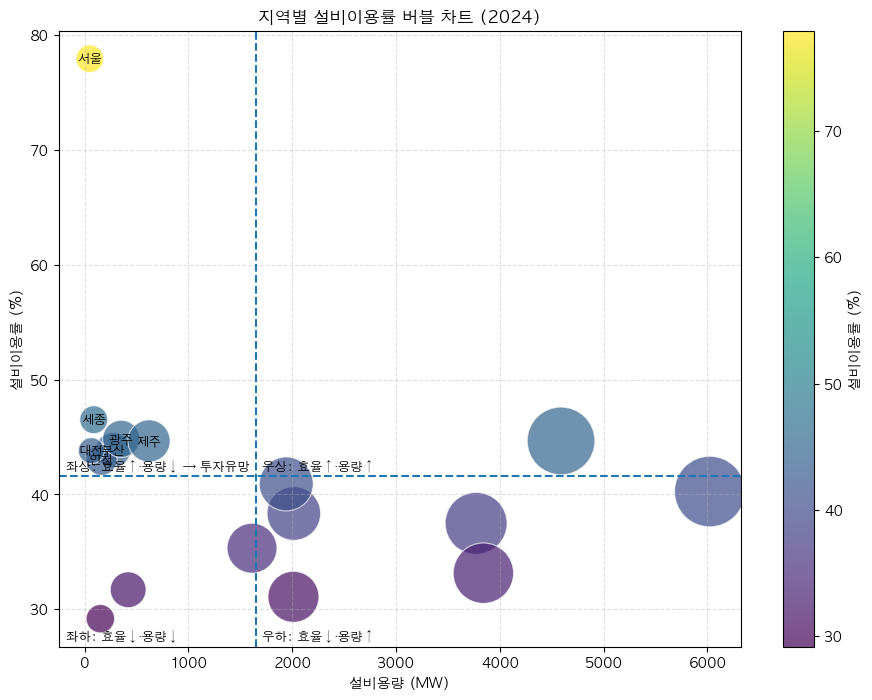

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ===== 0) 경로 =====
cap_path = "dataset/지역별_누적_설비용량.xlsx"
gen_path = "dataset/지역별_누적_발전량.xlsx"

# ===== 1) wide(가로) -> long(세로) 변환 유틸 =====
def wide_row_to_long(path, search_keyword, value_col_name):
    df = pd.read_excel(path)
    first_col = df.columns[0]
    df = df.rename(columns={first_col: "지표"})
    df["지표"] = df["지표"].astype(str).str.strip()

    row = df[df["지표"].str.contains(search_keyword, na=False)]
    if row.empty:
        raise ValueError(f"'{search_keyword}' 행을 {path}에서 찾지 못했습니다.")

    # 라벨/합계 제거 후 전치 → (지역, 값)
    row = row.drop(columns=["지표"])
    if "합계" in row.columns:
        row = row.drop(columns=["합계"])
    long = row.T.reset_index()
    long.columns = ["지역", value_col_name]

    # 숫자형 정리(천단위 콤마/공백/대시)
    long[value_col_name] = (
        long[value_col_name].astype(str)
        .str.replace(",", "", regex=False)
        .str.replace(" ", "", regex=False)
        .replace({"-": np.nan})
    )
    long[value_col_name] = pd.to_numeric(long[value_col_name], errors="coerce")
    return long

# ===== 2) 데이터 결합 & 파생 =====
cap_long = wide_row_to_long(cap_path, r"설비용량", "설비용량(MW)")
gen_long = wide_row_to_long(gen_path, r"발전량", "발전량(MWh)")

df = cap_long.merge(gen_long, on="지역", how="inner")
df["연도"] = 2024
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["설비용량(MW)", "발전량(MWh)"])
df = df[df["설비용량(MW)"] > 0]

# 설비이용률(%) = 발전량(MWh) / (설비용량(MW) * 8760h) * 100
df["설비이용률(%)"] = (df["발전량(MWh)"] / (df["설비용량(MW)"] * 8760)) * 100

# 평균(기준선)
mean_cap = df["설비용량(MW)"].mean()
mean_cf  = df["설비이용률(%)"].mean()

# 투자유망: 효율≥평균 ∧ 용량<평균 (좌상 사분면)
mask_opportunity = (df["설비이용률(%)"] >= mean_cf) & (df["설비용량(MW)"] < mean_cap)

# 버블 사이즈: 면적 기준 sqrt 스케일
mwh = df["발전량(MWh)"].clip(lower=0)
sizes = (np.sqrt(mwh / mwh.max()) * 2500) + 80   # 필요시 2500/80 조절

# ===== 3) 버블 차트 =====
plt.figure(figsize=(11, 8))

sc = plt.scatter(
    df["설비용량(MW)"], df["설비이용률(%)"],
    s=sizes, c=df["설비이용률(%)"], alpha=0.7, edgecolors="white", linewidths=0.8
)

# 기준선(지역 평균)
plt.axhline(mean_cf, linestyle="--")
plt.axvline(mean_cap, linestyle="--")

# 투자유망 지역만 라벨 표시
for _, r in df[mask_opportunity].iterrows():
    plt.text(r["설비용량(MW)"], r["설비이용률(%)"], r["지역"],
            ha="center", va="center", fontsize=9)

# 축/제목/그리드/컬러바
plt.title("지역별 설비이용률 버블 차트 (2024)")
plt.xlabel("설비용량 (MW)")
plt.ylabel("설비이용률 (%)")
plt.grid(True, linestyle="--", alpha=0.4)
cb = plt.colorbar(sc)
cb.set_label("설비이용률 (%)")

# 사분면 해석 힌트(가독을 위해 구석에 작은 텍스트)
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.text(xmin + (xmax-xmin)*0.01, mean_cf + (ymax-ymin)*0.01, "좌상: 효율↑·용량↓ → 투자유망", fontsize=9)
plt.text(xmin + (xmax-xmin)*0.01, ymin + (ymax-ymin)*0.01, "좌하: 효율↓·용량↓", fontsize=9)
plt.text(mean_cap + (xmax-xmin)*0.01, mean_cf + (ymax-ymin)*0.01, "우상: 효율↑·용량↑", fontsize=9)
plt.text(mean_cap + (xmax-xmin)*0.01, ymin + (ymax-ymin)*0.01, "우하: 효율↓·용량↑", fontsize=9)

# plt.tight_layout()
# plt.show()

cap_long

In [ ]:
# 데이터 불러오기
df = pd.read_csv("")
df = pd.read_excel("")

# 연도별 전국 평균 설비 이용률 추세
plt.figure(figsize=()) # widths, height 설정
yearly_avg = df.groupby("연도")["설비이용률(%)"].mean().reset_index()
sns.lineplot(data=yearly_avg, x="연도", y="설비이용률(%)", marker="o")
plt.title("연도별 전국 평균 설비 이용률 추세", fontsize=14)
plt.ylabel("설비 이용률 (%)")
plt.grid(True, alpha=0.3)
plt.show()

# 지역별 설비 이용률 순위(평균)
plt.figure(figsize=()) # widths, height 살정
region_avg = df.groupby("지역")["설비이용률(%)"].mean().reset_index()
sns.barplot(data=region_avg.sort_values("설비이용률(%)", ascending=False),
            x="설비이용률(%)", y="지역")
plt.title("지역별 평균 설비 이용률 순위", fontsize=14)
plt.xlabel("평균 설비 이용률 (%)")
plt.show()


In [ ]:
# ['연도','지역','설비용량(MW)','발전량(MWh)','설비이용률(%)']

df = pd.read_csv("solar_result.csv")

# ---- 1) 지역별 1점만 남기기: 최신 연도 기준 -----------------------
latest = df['연도'].max()
sub = df[df['연도'] == latest].copy()

# 같은 지역에 여러 행이 있으면 집계(보통 합계가 타당)
g = (sub.groupby('지역', as_index=False)
    .agg({'설비용량(MW)':'sum', '발전량(MWh)':'sum'}))
g['설비이용률(%)'] = g['발전량(MWh)'] / (g['설비용량(MW)'] * 8760) * 100

# ---- 2) 사분면 기준선 ------------------------------------------------
mean_cap = g['설비용량(MW)'].mean()
mean_cf  = g['설비이용률(%)'].mean()

# ---- 3) 하이라이트 규칙 ----------------------------------------------
# A) 고효율 상위 25% (효율 강조)
p75 = np.percentile(g['설비이용률(%)'], 75)
g['고효율'] = g['설비이용률(%)'] >= p75

# B) 2사분면(효율↑, 설비용량↓) = 투자 유망
g['투자유망'] = (g['설비이용률(%)'] >= mean_cf) & (g['설비용량(MW)'] < mean_cap)

# ---- 4) 플로팅 -------------------------------------------------------
fig, ax = plt.subplots(figsize=(10,7))

# (선택) 2사분면 영역을 은은히 칠해 강조
# ymax = max(g['설비이용률(%)']) * 1.05
# rect = patches.Rectangle((0, mean_cf), mean_cap, ymax-mean_cf,
#                         linewidth=0, facecolor='#e6f2ff', alpha=0.6)
# ax.add_patch(rect)

# 산점(버블): 색=효율, 크기=발전량
sc = ax.scatter(g['설비용량(MW)'], g['설비이용률(%)'],
                c=g['설비이용률(%)'], s=g['발전량(MWh)']/1000,
                cmap='viridis', alpha=0.8, edgecolors='k')

# 기준선
ax.axhline(mean_cf, color='red', linestyle='--', linewidth=1, label='평균 설비이용률')
ax.axvline(mean_cap, color='green', linestyle='--', linewidth=1, label='평균 설비용량')

# 라벨: 투자유망(True)인 지역만 표기(가독성)
for _, r in g[g['투자유망']].iterrows():
    ax.text(r['설비용량(MW)'], r['설비이용률(%)'], r['지역'],
            fontsize=9, ha='center', va='bottom')

# 컬러바(효율 척도)
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('설비이용률(%)')

ax.set_title(f'버블 차트: 설비용량 vs 설비이용률 (최근연도 {latest})')
ax.set_xlabel('설비용량 (MW)')
ax.set_ylabel('설비이용률 (%)')
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()

# ---- 5) 결과표: 효율↑·설비용량↓ (2사분면) ----------------------------
candidates = g[g['투자유망']].sort_values('설비이용률(%)', ascending=False)
print('📌 확대 투자 유망 지역(2사분면):')
print(candidates[['지역','설비용량(MW)','설비이용률(%)']].to_string(index=False))
